In [9]:
import numpy as np 
from numpy.fft import fft2, ifft2

import matplotlib.pyplot as plt 

from skimage.transform import rescale
from scipy import misc


In [15]:
img = misc.face()
img = rescale(img, 0.25,multichannel=True).transpose(2,0,1)

print(img.shape)

(3, 192, 256)


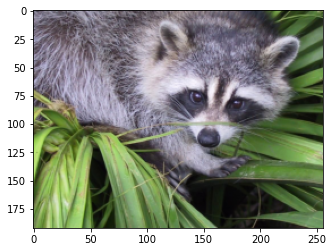

In [16]:
plt.figure()
plt.imshow(img.transpose(1,2,0))
plt.show()

In [17]:
def azimuthalAverage(img):
    y, x = np.indices(img.shape)
    center = np.array([(x.max()-x.min())/2.0, (y.max()-y.min())/2.0])

    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    
    # Get sorted radii
    ind = np.argsort(r.flat)
    r_sorted = r.flat[ind]
    i_sorted = img.flat[ind]
    
    # Get the integer part of the radii (bin size = 1)
    r_int = r_sorted.astype(int)
    
    # Find all pixels that fall within each radial bin.
    deltar = r_int[1:] - r_int[:-1]  # Assumes all radii represented
    rind = np.where(deltar)[0]       # location of changed radius
    nr = rind[1:] - rind[:-1]        # number of radius bin
    
    # Cumulative sum to figure out sums for each radius bin
    csim = np.cumsum(i_sorted, dtype=float)
    tbin = csim[rind[1:]] - csim[rind[:-1]]

    radial_prof = tbin / nr
    
    return radial_prof

In [18]:
image_fft = fft2(img)
print(image_fft.shape)
image_fftshift = np.fft.fftshift(image_fft)
power_spectrum = np.abs(image_fftshift)**2
magnitude_spectrum = 20*np.log(np.abs(image_fftshift))

(3, 192, 256)


In [19]:
print(power_spectrum.shape)

(3, 192, 256)


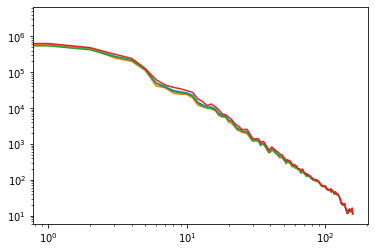

In [29]:
plt.figure()
azimuthMean = np.mean(np.asarray([azimuthalAverage(power_spectrum[i,:,:]) for i in range(3)]),axis=0)
plt.loglog(azimuthMean)

plt.loglog(azimuthalAverage(power_spectrum[0,:,:]))
plt.loglog(azimuthalAverage(power_spectrum[1,:,:]))
plt.loglog(azimuthalAverage(power_spectrum[2,:,:]))
plt.show()

In [28]:
azimuthMean.shape

(158,)